In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/airbnb prices.csv')

In [3]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7.0,4.5,2.0,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45.0,4.5,4.0,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1.0,0.0,3.0,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7.0,5.0,4.0,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1.0,0.0,2.0,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


### Dropping unused columns

In [4]:
df = df.drop(['country','borough','minstay'],axis=1)

### Types of Room available: Shared, Entire home and Private room


In [5]:
df.room_type.unique()

array(['Shared room', 'Entire home/apt'], dtype=object)

### Removing shared room type as they are very low 

In [6]:
df.room_type.value_counts()

Entire home/apt    9258
Shared room          63
Name: room_type, dtype: int64

In [7]:
df = df[df.room_type != "Shared room"]

In [8]:
df.room_type.value_counts()

Entire home/apt    9258
Name: room_type, dtype: int64

### Popularity of different neighbourhoods


In [9]:
df.neighborhood.value_counts()

De Baarsjes / Oud West                    1691
De Pijp / Rivierenbuurt                   1393
Centrum West                              1297
Centrum Oost                              1015
Noord-West / Noord-Midden                  849
Westerpark                                 639
Oud Oost                                   491
Bos en Lommer                              351
Oostelijk Havengebied / Indische Buurt     309
Watergraafsmeer                            226
Ijburg / Eiland Zeeburg                    217
Oud Noord                                  191
Slotervaart                                138
Buitenveldert / Zuidas                     110
Noord Oost                                  80
Noord West                                  77
Osdorp                                      51
Geuzenveld / Slotermeer                     41
De Aker / Nieuw Sloten                      38
Bijlmer Oost                                23
Bijlmer Centrum                             17
Gaasperdam / 

### No. of records for which reviews are 0 or 1

In [10]:
df.room_id[df['reviews']  == 0].count()

1651

In [11]:
df.room_id[df['reviews']  == 1].count()

743

### Overall satisfaction by each rating

In [12]:
df['overall_satisfaction'].value_counts()

5.0    3983
0.0    3036
4.5    1967
4.0     225
3.5      37
3.0       8
2.5       1
Name: overall_satisfaction, dtype: int64

### Sub dataframe where overall satisfaction is 0

In [13]:
zero_satisfaction = df[df['overall_satisfaction'] == 0]

In [14]:
zero_satisfaction

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,name,last_modified,latitude,longitude,location
34,3119298,1476,15847782,Entire home/apt,Amsterdam,Westerpark,1.0,0.0,8.0,3.0,NaN,445.0,Modern 5-8 person apartment,2017-07-23 12:58:15.945759,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
36,10511291,1476,5421078,Entire home/apt,Amsterdam,Watergraafsmeer,1.0,0.0,8.0,3.0,NaN,1412.0,Whole house 200m2 Frankendael Park,2017-07-23 12:30:42.249974,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,Amsterdam,Centrum West,0.0,0.0,4.0,4.0,NaN,541.0,Great 4 bedroom apartment at the flower market,2017-07-23 12:30:27.637777,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,1476,7215538,Entire home/apt,Amsterdam,Noord-West / Noord-Midden,2.0,0.0,4.0,2.0,NaN,594.0,MuseumSquare apartment with garden,2017-07-23 12:30:27.627216,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
40,5818567,1476,29561840,Entire home/apt,Amsterdam,De Aker / Nieuw Sloten,0.0,0.0,4.0,2.0,NaN,361.0,"Luxurous, modern, bright appartment",2017-07-23 12:29:20.728096,52.346007,4.811830,0101000020E61000008FA50F5D503F1340F29716F5492C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9292,18497505,1476,65859990,Entire home/apt,Amsterdam,De Pijp / Rivierenbuurt,1.0,0.0,4.0,1.0,NaN,125.0,Cosy and trendy APT in buzzing De Pijp district!,2017-07-22 20:08:54.332313,52.349503,4.889673,0101000020E61000006E895C70068F13404C6DA983BC2C...
9294,13163462,1476,45115094,Entire home/apt,Amsterdam,De Pijp / Rivierenbuurt,1.0,0.0,2.0,1.0,NaN,144.0,Lovely apartment in trendy area of Amsterdam!,2017-07-22 20:08:54.326358,52.354991,4.899683,0101000020E61000009411178046991340EAAF5758702D...
9295,10309998,1476,25800393,Entire home/apt,Amsterdam,De Pijp / Rivierenbuurt,2.0,0.0,2.0,1.0,NaN,144.0,"""Boven het Plein"" 2 rooms, kitchen & Badroom",2017-07-22 20:08:54.323718,52.351199,4.894983,0101000020E610000064E76D6C76941340A7B1BD16F42C...
9296,7167905,1476,18261939,Entire home/apt,Amsterdam,Noord-West / Noord-Midden,2.0,0.0,2.0,1.0,NaN,132.0,Bright app. close to Museum quarter,2017-07-22 20:08:54.318802,52.352727,4.883391,0101000020E6100000AC527AA69788134046B58828262D...


In [15]:
zero_satisfaction.describe()

,room_id,survey_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,latitude,longitude
count,3.036000e+03,3036.0,3.036000e+03,3036.000000,3036.0,3036.000000,3036.000000,0.0,3036.000000,3036.000000,3036.000000
mean,1.473307e+07,1476.0,4.630192e+07,0.669960,0.0,3.541173,1.902833,NaN,232.310935,52.363553,4.889450
std,5.240895e+06,0.0,4.465050e+07,0.810414,0.0,1.412331,1.016233,NaN,169.571609,0.014842,0.035322
min,5.102500e+04,1476.0,2.234000e+03,0.000000,0.0,1.000000,0.000000,NaN,57.000000,52.296200,4.772822
25%,1.174803e+07,1476.0,9.432606e+06,0.000000,0.0,2.000000,1.000000,NaN,167.000000,52.353352,4.864746
50%,1.646518e+07,1476.0,2.800595e+07,0.000000,0.0,4.000000,2.000000,NaN,192.000000,52.362567,4.886865
75%,1.913786e+07,1476.0,7.520661e+07,1.000000,0.0,4.000000,2.000000,NaN,250.500000,52.373200,4.905233
max,2.000373e+07,1476.0,1.418319e+08,5.000000,0.0,16.000000,10.000000,NaN,6000.000000,52.424980,5.013075


### Overall satisfaction for different no. of bedrooms

In [16]:
overall_satisfaction = df['overall_satisfaction'].groupby(by=df['bedrooms'])
overall_satisfaction.sum()

bedrooms
0.0       943.5
1.0     12948.5
2.0     10895.5
3.0      3507.0
4.0      1196.0
5.0       223.5
6.0        65.5
7.0         9.5
8.0         9.0
9.0         5.0
10.0       19.5
Name: overall_satisfaction, dtype: float64

### Overall satisfaction where price greater than equal to 150 and less than 180

In [17]:
df.overall_satisfaction[df['price'].between(150,179, inclusive=True)].count()

2550

### To see where is the most availability in terms of accomodates

In [18]:
df['accommodates'].value_counts()

4.0     4276
2.0     3167
3.0      792
6.0      421
5.0      393
8.0       96
7.0       43
16.0      17
10.0      14
1.0       12
12.0       9
9.0        7
14.0       6
11.0       2
13.0       1
17.0       1
Name: accommodates, dtype: int64

### To see at what price most properties are available

In [19]:
df['price'].describe()

count    9257.000000
mean      223.731879
std       127.803368
min        42.000000
25%       162.000000
50%       190.000000
75%       240.000000
max      6000.000000
Name: price, dtype: float64

#### Only 23 records have price greater than 1000

In [20]:
df.price[df['price'].between(1000,6000, inclusive=True)].count()

23

### Proportion of each bedroom value

In [21]:
df_bedroom = df['bedrooms']
df_count = df_bedroom.groupby([df['bedrooms']]).count()
df_sum = df_count.sum()
df_groups = df_count.apply(lambda x: 100*x/df_sum)
df_groups

bedrooms
0.0      3.208383
1.0     41.071621
2.0     36.242843
3.0     13.762558
4.0      4.709949
5.0      0.669763
6.0      0.194447
7.0      0.032408
8.0      0.032408
9.0      0.021605
10.0     0.054013
Name: bedrooms, dtype: float64

### Dropping all 0 bedroom records

In [22]:
df = df[df['bedrooms']!=0]

### Histogram showing no.of apartments having 0-100 reviews

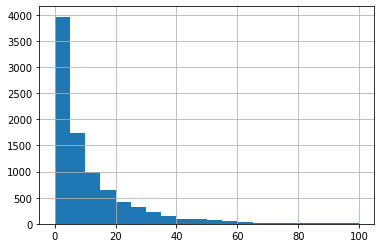

In [23]:
df['reviews'].hist(bins=20, range = [0,100])

### Histogram showing no.of apartments having 0-1000 reviews

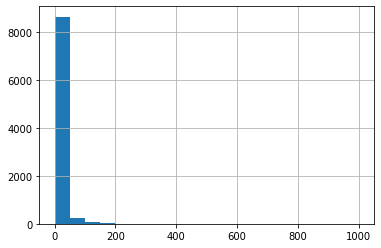

In [24]:
df['reviews'].hist(bins=20, range = [0,1000])

### Histogram showing accomodations

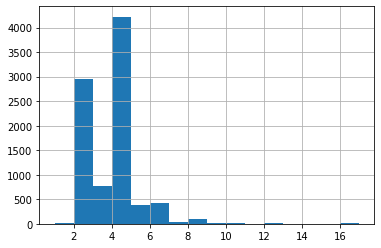

In [25]:
df['accommodates'].hist(bins=16)

### Histogram showing overall satisfaction

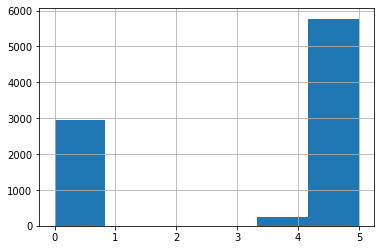

In [27]:
df['overall_satisfaction'].hist(bins=6)

### Histograms showing different levels of satisfaction for different prices

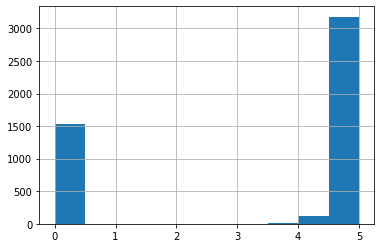

In [28]:
df_price1 = df[df['price'].between(100,200,inclusive=True)]
df_price1['overall_satisfaction'].hist()

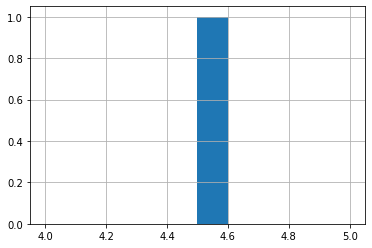

In [29]:
df_price2 = df[df['price']<50]
df_price2['overall_satisfaction'].hist()

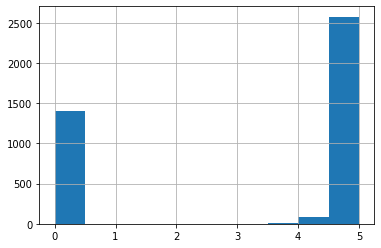

In [30]:
df_price3 = df[df['price']>200]
df_price3['overall_satisfaction'].hist()

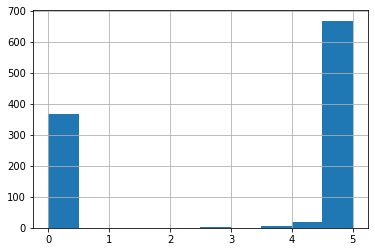

In [31]:
df_price4 = df[df['price']>300]
df_price4['overall_satisfaction'].hist()

### Relation between Price and Reviews

In [32]:
price_reviews_corr = df['price'].corr(df['reviews'])
price_reviews_corr

-0.0017118512691846278

### Relation between Accomodates and Price

In [33]:
acc_price_corr = df['accommodates'].corr(df['price'])
acc_price_corr

0.405088607104604

### Relation between Overall Satisfaction and Price

In [34]:
satisfaction_price_corr = df['overall_satisfaction'].corr(df['price'])
satisfaction_price_corr

-0.042517886126699406

### Relation between Bedrooms and Price

In [35]:
bedrooms_price_corr = df['bedrooms'].corr(df['price']) 
bedrooms_price_corr

0.34442350243554337

### Availability based on neighbourhood

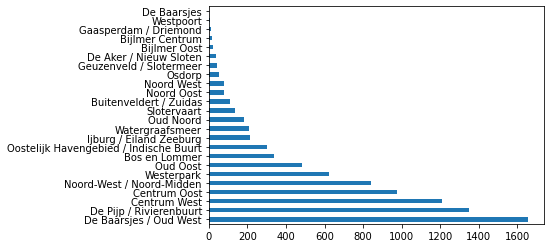

In [36]:
df['neighborhood'].value_counts().plot(kind='barh')